# Análisis función Seno

Análisis del cálculo de la función seno utilizando diferentes estrategias de paralelización.

### Imports de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sin X Original

In [2]:
df_ori_easy = pd.read_csv('./datasets/sinx.1.1.csv')
df_ori_hard = pd.read_csv('./datasets/sinx.172635172.1.1.csv')

df_ori_easy.head()

,program,time,threads
0,./sin/sinx,3.707709,1
1,./sin/sinx,3.681935,1
2,./sin/sinx,3.629778,1
3,./sin/sinx,3.736492,1
4,./sin/sinx,3.669492,1


In [3]:
df_ori_easy_med = df_ori_easy.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')
df_ori_hard_med = df_ori_hard.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')

In [4]:
df_ori_easy_med.head()

,threads,time
0,1,3.68115


In [5]:
df_ori_hard_med.head()

,threads,time
0,1,9.408867


<Axes: >

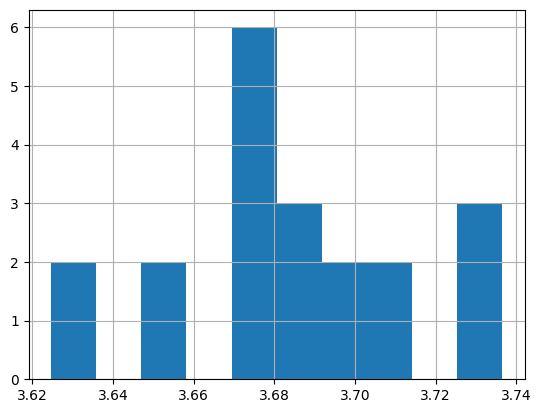

In [6]:
df_ori_easy['time'].hist()

<Axes: >

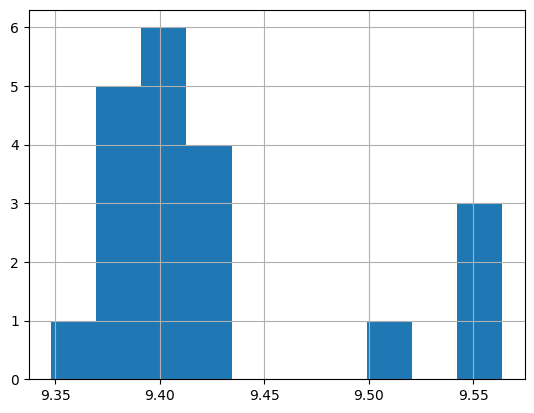

In [7]:
df_ori_hard['time'].hist()

# Sinx with OpenMP

In [8]:
df_p_easy = pd.read_csv('./datasets/sinx-p.1.128.csv')
df_p_hard = pd.read_csv('./datasets/sinx-p.172635172.1.128.csv')

df_p_easy.head()

,program,time,threads
0,./sin/sinx-p,3.625289,1
1,./sin/sinx-p,3.632676,1
2,./sin/sinx-p,3.664584,1
3,./sin/sinx-p,3.643174,1
4,./sin/sinx-p,3.625909,1


In [9]:
df_p_easy_med = df_p_easy.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')
df_p_hard_med = df_p_hard.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')

df_p_easy_med.head()

,threads,time
0,1,3.639174
1,2,2.187928
2,3,1.702626
3,4,1.335014
4,5,1.133941


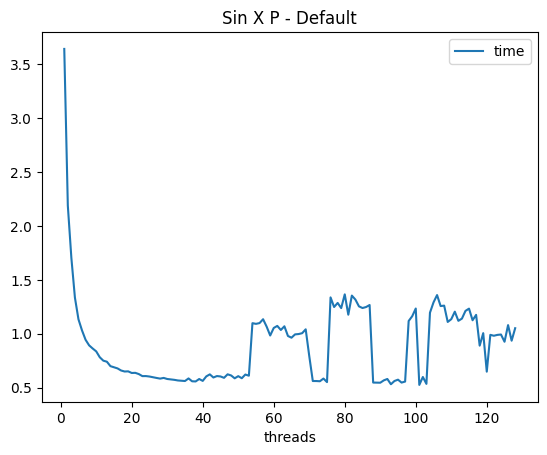

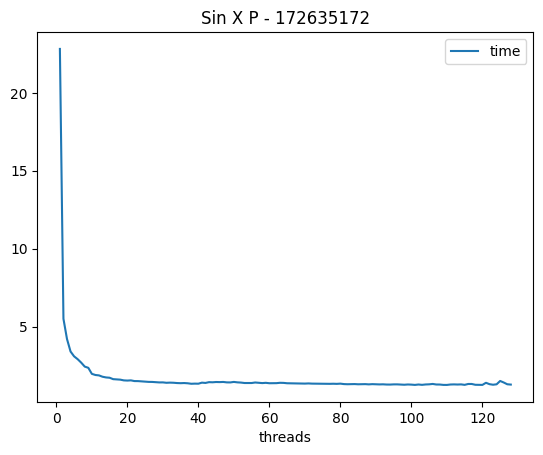

In [10]:
df_p_easy_med.plot(x='threads', y='time', title='Sin X P - Default')
df_p_hard_med.plot(x='threads', y='time', title='Sin X P - 172635172')

plt.show()